In [65]:
# Decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors


In [66]:
from matplotlib.colors import ListedColormap

def knn_comparison(data, n_neighbors = 15): #data,nearest_neighbors # this function finds k-NN and plots the data
    x = data[:,:2]  # this gives all the datapoints with first two columns(0,1)   #x,y -axis
    y = data[:,2]   # class labels [it contains only 2nd column]             # 2nd column is for class-label
    
    #grid cell size
    h = .02           # grid_width = 0.02
    # colors of values 
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors)   # K-NN classifier
    clf.fit(x,y)   # fit the k-nn clasiffier with elements and class_label
    
    x_min, x_max = x[:, 0].min()-1 , x[:, 0].max()+1  # x - axis ranges from 3.9 to 8.9
    y_min, y_max = x[:, 1].min()-1 , x[:, 1].max()+1  # y - axis ranges from 1 to 4.8 
                                                      # becoz here we have to create the mesh grid to fit our plots
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid  # predict positive or negative
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # xx.ravel() will give a flatten array
    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)# scatter plot of with given points
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()
    

    
    

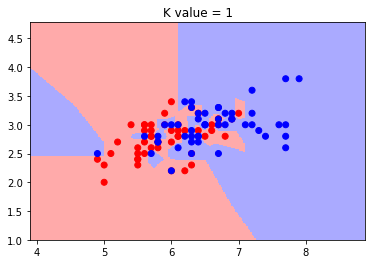

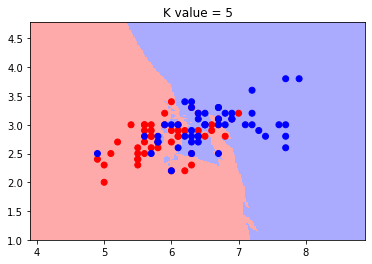

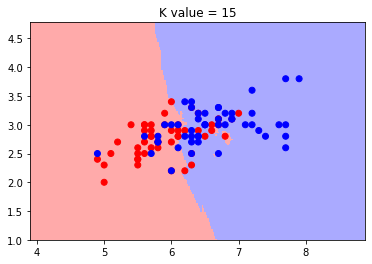

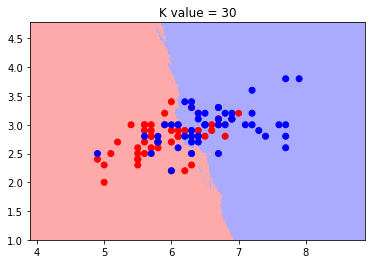

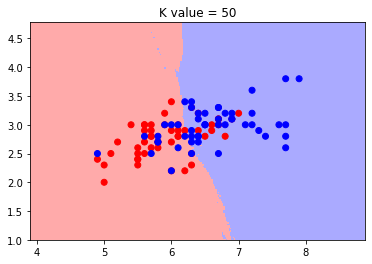

In [68]:
data = np.genfromtxt('./demo_data-20200421T122322Z-001/demo_data/6.overlap.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)

In [12]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
# =============================================================================================

In [22]:
# Part I
# ============================== data preprocessing ===========================================

# define column_names
names = ['x','y','class']

# loading training dataset

df = pd.read_csv('./demo_data-20200421T122322Z-001/demo_data/3.concertriccir2.csv',header = None,names = names)
print(df.head())

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [24]:
# creating design matrix X and target vector Y
x = np.array(df.iloc[:, 0:2]) # end index is exclusive  # x1,x2,.........x100  # datapoints  
y = np.array(df['class']) # showing you two ways of indexing a pandas df   # classes


## simple cross validation

In [33]:
# split the data set into train and test
x_1, x_test, y_1, y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)#test =30perc
#x_1 means x_train = 70 percent of data and x_test = 30 percent of data
# breakup data so that test_data = 30 percent and train_data = 70 percent

# split the train data set into cross validation train and cross validation test

x_tr, x_cv, y_tr, y_cv = model_selection.train_test_split(x_1,y_1,test_size=0.3)

# again im splitting 30percent data from training data for cross validation and rest is for the training data
# now test_data = 30 percent ; cross_validation = 30 percent from the 70 percent = 21 percent
# train_data = 40 percent from the 70 percent = 49 percent

for i in range(1,30,2):   # only odd numbers
    #instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i) # no of nearesr neighbors are i(odd_numbers)
    
    # fitting the model on crossvalidation train
    knn.fit(x_tr , y_tr)
    
    # predict the response on the cv_train
    pred = knn.predict(x_cv)
    
    #evaluate cv accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100) # i get accuracy from cv class label
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))

knn = KNeighborsClassifier(1)
knn.fit(x_tr,y_tr)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100) # i get accuracy from cv class label
print('\nTest accuracy for k = 1 is %d%%' % ( acc))



CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 85%

CV accuracy for k = 5 is 84%

CV accuracy for k = 7 is 80%

CV accuracy for k = 9 is 81%

CV accuracy for k = 11 is 80%

CV accuracy for k = 13 is 84%

CV accuracy for k = 15 is 81%

CV accuracy for k = 17 is 78%

CV accuracy for k = 19 is 78%

CV accuracy for k = 21 is 77%

CV accuracy for k = 23 is 77%

CV accuracy for k = 25 is 74%

CV accuracy for k = 27 is 73%

CV accuracy for k = 29 is 70%

Test accuracy for k = 1 is 90%


## 10 fold cross validation


The optimal number of neighbors is 1.


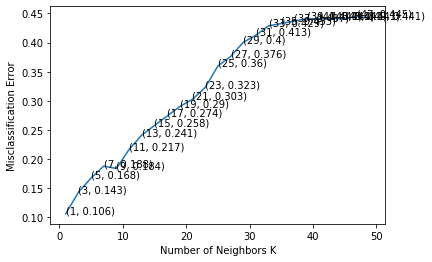

the misclassification error for each k value is :  [0.106 0.143 0.168 0.188 0.184 0.217 0.241 0.258 0.274 0.29  0.303 0.323
 0.36  0.376 0.4   0.413 0.429 0.433 0.437 0.441 0.441 0.441 0.441 0.445
 0.441]


In [59]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x:x%2!=0,myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_tr,y_tr, cv=3, scoring = 'accuracy' ) # 10 fold cross validation
                                    # || data                        || metric
    cv_scores.append(scores.mean())  # im taking average score across these 10 folded cv and storing it in cv_scores
    
# changing to misclassification error  ==> 1 - accuracy
MSE = [1 - x for x in cv_scores]

#determining best optimal k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [64]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_tr,y_tr)

# predict the response
pred = knn_optimal.predict(x_test)
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 90.000000%
